# The spelled-out intro to language modeling: building makemore

In [337]:
words = open("/Users/phucnguyen/PyCharmMiscProject/2.makemore/names.txt").read().splitlines()
chars = sorted(set(''.join(words)))

In [212]:
atoi = {'.': 0}
for index, char in enumerate(chars):
    atoi[char] = index + 1

In [213]:
itoa = {0 : '.'}
for index, char in enumerate(chars):
    itoa[index + 1] = char

In [214]:
import torch

N = torch.zeros((27,27))

In [215]:
for word in words:
    normalized = "." + word + "."
    for c1, c2 in zip(normalized, normalized[1:]):
        r = atoi[c1]
        c = atoi[c2]
        N[r, c] += 1

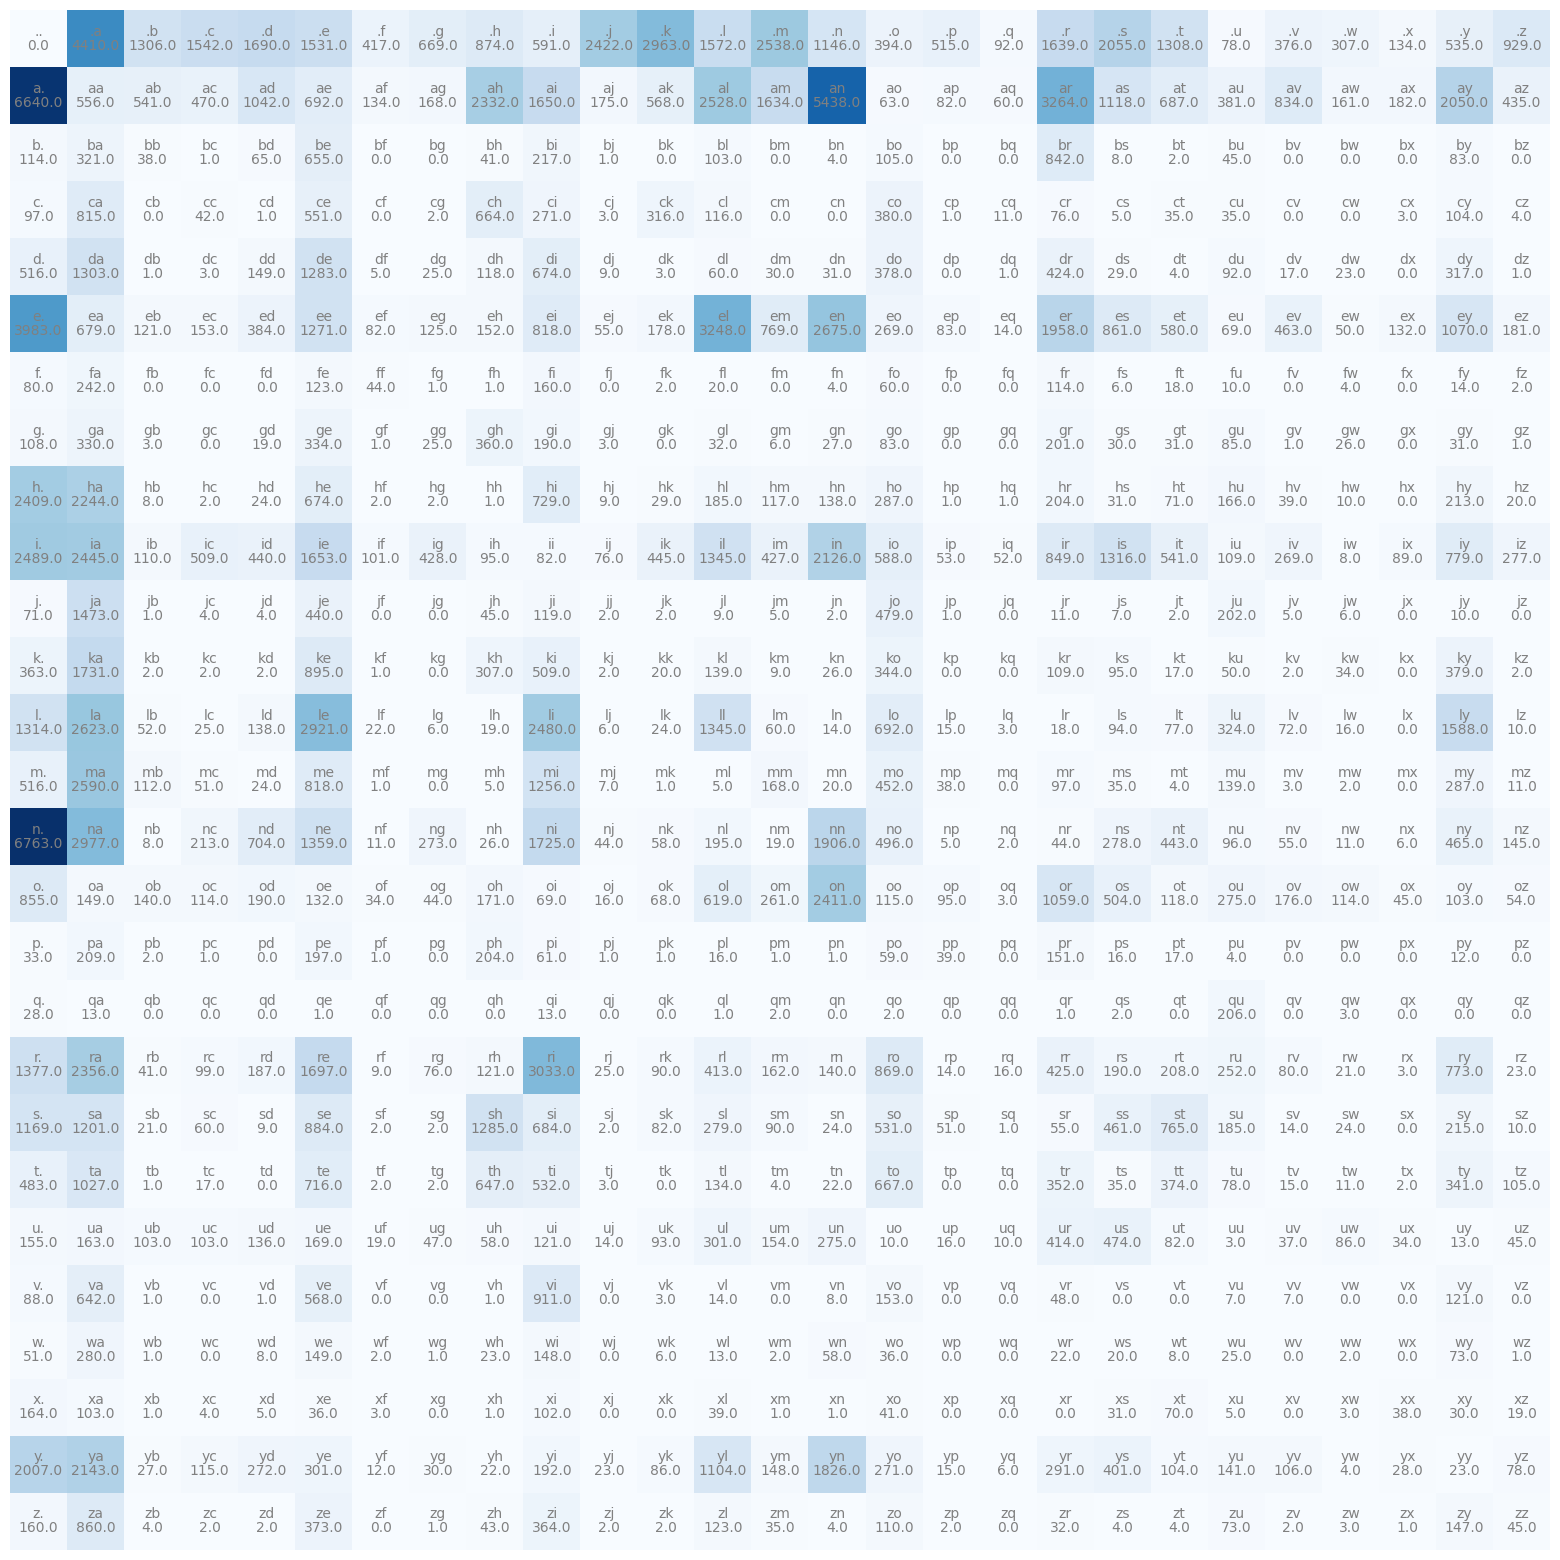

In [216]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,20))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itoa[i] + itoa[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [217]:
P = N.float()
P = P / P.sum(1, keepdim=True)

In [218]:
g_cpu = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    position = 0
    while True:
        chrIdx = torch.multinomial(P[position], 1, replacement=True, generator=g_cpu).item()
        position = chrIdx

        chrStr = itoa[chrIdx]
        out.append(chrStr)
        if chrStr == '.':
            break
    print(f"{''.join(out)}")


cexze.
momasurailezitynn.
konimittain.
llayn.
ka.


## Evaluate how good our model

In [219]:
# fix infinite negative by adding fake count for dataset
P = (N+1).float()
P = P / P.sum(1, keepdim=True)

In [220]:
# log(abc) = log(a) + log(b) + log(c)
log_likelyhood = 0.0
n = 0
for word in words:
    normalized = "." + word + "."
    for c1, c2 in zip(normalized, normalized[1:]):
        r = atoi[c1]
        c = atoi[c2]
        prob = P[r,c]
        log_likelyhood += torch.log(prob)
        n += 1

nll = (-log_likelyhood) / n
print(f'{log_likelyhood=}')
print(f'{nll=}')

log_likelyhood=tensor(-559951.5625)
nll=tensor(2.4544)


# Building model

In [221]:
# sampling
xs, ys = [], []
for word in words:
    normalized = "." + word + "."
    for c1, c2 in zip(normalized, normalized[1:]):
        xs.append(atoi[c1])
        ys.append(atoi[c2])

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [262]:
import torch.nn.functional as F
# y = Wx + b
W = torch.randn((27, 27), generator=g_cpu, requires_grad=True)

(tensor([     0,      1,      2,  ..., 228143, 228144, 228145]),
 tensor([ 5, 13, 13,  ..., 26, 24,  0]))

In [336]:
xenc = F.one_hot(xs, num_classes=27).float()

for i in range(100):
    # forward pass
    Wx = xenc @ W
    logits = Wx.exp()
    probs = logits / logits.sum(1, keepdim=True)
    loss = -probs[torch.arange(xs.nelement()), ys].log().mean() + 0.01*(W**2).mean()

    if i % 10 == 0:
        print(f'iterate={i}, loss={loss.item()}')

    # backward pass
    W.grad = None
    loss.backward()

    # update weights
    W.data += -50 * W.grad

iterate=0, loss=2.4805514812469482
iterate=10, loss=2.480543375015259
iterate=20, loss=2.4805359840393066
iterate=30, loss=2.4805288314819336
iterate=40, loss=2.480522394180298
iterate=50, loss=2.4805164337158203
iterate=60, loss=2.480510711669922
iterate=70, loss=2.4805057048797607
iterate=80, loss=2.4805006980895996
iterate=90, loss=2.4804959297180176


In [334]:
# Updated prediction with our model
for i in range(5):
    out = []
    position = 0
    while True:
        # p = P[position]
        xenc = F.one_hot(torch.tensor([position]), num_classes=27).float()
        Wx = xenc @ W
        logits = Wx.exp()
        p = logits / logits.sum(1, keepdim=True)

        chrIdx = torch.multinomial(p, 1, replacement=True, generator=g_cpu).item()
        position = chrIdx

        chrStr = itoa[chrIdx]
        out.append(chrStr)
        if chrStr == '.':
            break
    print(f"{''.join(out)}")


drelmeinalan.
e.
pikayamfalynhe.
mse.
amemrananafitaazaleyl.
